In [37]:
import tensorflow as tf
import numpy as np
import zipfile
import os
import glob 
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
ekstrak_zip = '/content/drive/MyDrive/SIB/Bottle Images.zip'
out_zip = zipfile.ZipFile(ekstrak_zip, 'r')
out_zip.extractall('/tmp/')
out_zip.close()

In [40]:
dir_dataset = "/tmp/Bottle Images"
dir_beerBottles = os.path.join("/tmp/Bottle Images/Beer Bottles")
dir_plasticBottle = os.path.join("/tmp/Bottle Images/Plastic Bottles")
dir_sodaBottle= os.path.join("/tmp/Bottle Images/Soda Bottle")
dir_waterBottle= os.path.join("/tmp/Bottle Images/Water Bottle")
dir_wineBottle= os.path.join("/tmp/Bottle Images/Wine Bottle")

In [41]:
total_image = len(list(glob.iglob("/tmp/Bottle Images/*/*.*", recursive=True)))
print("Total Gambar     : ",total_image)

total_beerBottles = len(os.listdir(dir_beerBottles))
total_plasticBottle = len(os.listdir(dir_plasticBottle))
total_sodaBottle = len(os.listdir(dir_sodaBottle))
total_waterBottle = len(os.listdir(dir_waterBottle))
total_wineBottle = len(os.listdir(dir_wineBottle))

print("Total Data Beer Bottoles Image      : ",total_beerBottles)
print("Total Data Plastic Bottles Image    : ",total_plasticBottle)
print("Total Data Soda Bottles Image       : ",total_sodaBottle)
print("Total Data Water Bottles Image      : ",total_waterBottle)
print("Total Data Wine Bottles Image       : ",total_wineBottle)

Total Gambar     :  25000
Total Data Beer Bottoles Image      :  5000
Total Data Plastic Bottles Image    :  5000
Total Data Soda Bottles Image       :  5000
Total Data Water Bottles Image      :  5000
Total Data Wine Bottles Image       :  5000


In [42]:
Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = 0.2
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = 0.2
)

In [43]:
Train_generator = Train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (150, 150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (150, 150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [44]:
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),
     Dropout(0.2),
     Dense(128, activation = 'relu'),
     Dense(5, activation='softmax')
    ]
)

In [45]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [46]:
# Penggunaan Optimizer 'Adam' dengan learning rate 0.00146
Adam(learning_rate=0.00146, name='Adam')
Model.compile(
              optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [47]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("Akurasi mencapi 90% lebih")
      self.model.stop_training = True
callbacks = myCallback()

In [48]:
with tf.device("/device:GPU:0"):
  history = Model.fit(
                    Train_generator, 
                    epochs =  100, 
                    steps_per_epoch = 1751//16, 
                    validation_data = Validation_generator, 
                    verbose = 1, 
                    validation_steps = 437//16,
                    callbacks=[callbacks]
                    )

Epoch 1/100
109/109 [==============================] - 96s 878ms/step - loss: 1.5438 - accuracy: 0.2867 - val_loss: 1.4977 - val_accuracy: 0.2060
Epoch 2/100
109/109 [==============================] - 88s 811ms/step - loss: 1.3947 - accuracy: 0.3876 - val_loss: 1.3604 - val_accuracy: 0.5069
Epoch 3/100
109/109 [==============================] - 89s 812ms/step - loss: 1.3054 - accuracy: 0.4243 - val_loss: 1.5002 - val_accuracy: 0.3681
Epoch 4/100
109/109 [==============================] - 86s 792ms/step - loss: 1.2260 - accuracy: 0.4885 - val_loss: 1.2106 - val_accuracy: 0.5509
Epoch 5/100
109/109 [==============================] - 88s 807ms/step - loss: 1.1825 - accuracy: 0.5109 - val_loss: 1.0720 - val_accuracy: 0.5463
Epoch 6/100
109/109 [==============================] - 88s 810ms/step - loss: 1.1055 - accuracy: 0.5321 - val_loss: 1.1706 - val_accuracy: 0.5903
Epoch 7/100
109/109 [==============================] - 88s 809ms/step - loss: 0.9673 - accuracy: 0.6072 - val_loss: 0.9391 -

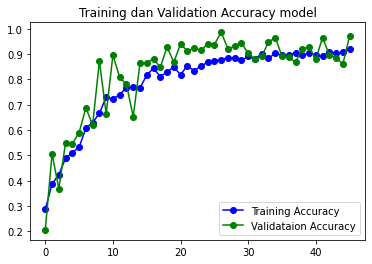

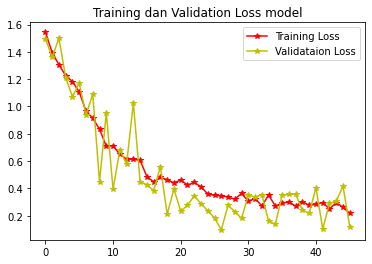

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy',marker = 'o')
plt.plot(epochs, val_acc, 'g', label = 'Validataion Accuracy',marker = 'o')
plt.title('Training dan Validation Accuracy model')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss',marker = '*')
plt.plot(epochs, val_loss, 'y', label = 'Validataion Loss',marker = '*')
plt.title('Training dan Validation Loss model')
plt.legend(loc = 'best')
plt.show()


pilih menu: 
1. input foto
2. selesai
  1


Saving 00000029.jpg to 00000029 (3).jpg
00000029.jpg


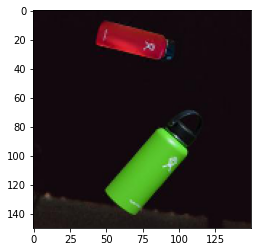

Gambar Botol Air

pilih menu: 
1. input foto
2. selesai
  1


Saving 00000000.jpg to 00000000 (5).jpg
00000000.jpg


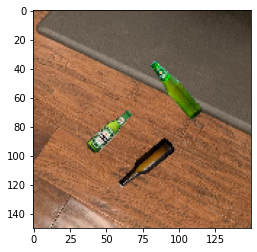

Gambar Botol Beer

pilih menu: 
1. input foto
2. selesai
  2
======selsasi======


In [53]:
def fungsi1():
  uploaded = files.upload()
  for fn in uploaded.keys():
  
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = Model.predict(images, batch_size=16)

    print(fn)
    plt.show(img)
    
    if classes[0][0]==1:
      print('Gambar Botol Beer')
    elif classes[0][1]==1:
      print('Gambar Botol Pelastik')
    elif classes[0][2]==1:
     print('Gambar Botol Soda')
    elif classes[0][3]==1:
     print('Gambar Botol Air')
    else :
     print('Gambar Botol Wine')

while True:
  pilihan = input ('''
pilih menu: 
1. input foto
2. selesai
  ''')
  if pilihan == '1':
    fungsi1()
  elif pilihan =='2':
    print('======selsasi======')
    break
  else:
    print('masukan pilihan yang lain')

In [58]:
warnings.filterwarnings('ignore')
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('RPS_model_LaluArditaArip.tflite', 'wb') as f:
  f.write(tflite_model)